In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.decomposition import PCA
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace = True, header = None)
Y_train = pd.read_csv('UCI HAR Dataset/train/Y_train.txt', delim_whitespace = True, header = None)

In [3]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


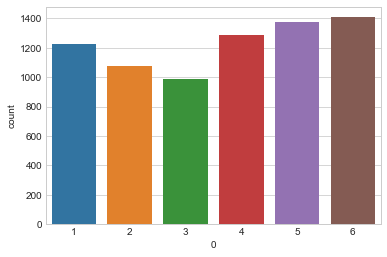

In [4]:
sb.set_style('whitegrid')
sb.countplot(x=Y_train[0])

Data doesn't have too much variations.
3 -- lowest value
6 -- highest values

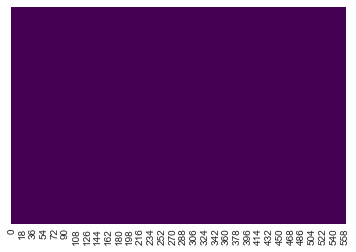

In [5]:
X_train.isnull()
sb.heatmap(X_train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

No null values in the X_train data

In [6]:
Y_train[0] = pd.Categorical(Y_train[0]) 
Y_train.describe()
type(Y_train[0])
pd.get_dummies(Y_train).describe()

,0_1,0_2,0_3,0_4,0_5,0_6
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.166757,0.145947,0.134113,0.174918,0.186888,0.191376
std,0.372784,0.353077,0.340797,0.379923,0.389848,0.393411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
X_train.cov().head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.004937,0.000425,-0.001022,0.000020,-0.000774,-0.001313,0.000187,-0.000777,-0.001384,0.001686,...,0.000541,-0.000396,-0.000337,-0.012880,0.000383,0.001600,0.000969,-0.001268,0.000718,0.000554
1,0.000425,0.001665,-0.000182,-0.000827,-0.000921,-0.000850,-0.000765,-0.000893,-0.000852,-0.000847,...,-0.000229,-0.000021,-0.000056,0.000970,-0.000248,0.000446,0.001476,-0.000111,0.000013,-0.000158
2,-0.001022,-0.000182,0.003208,-0.000514,-0.000474,-0.000199,-0.000450,-0.000418,-0.000047,-0.001147,...,-0.000291,0.000365,0.000333,0.001008,-0.001011,-0.002191,-0.000921,0.000249,-0.000258,-0.000358
3,0.000020,-0.000827,-0.000514,0.201363,0.209193,0.160011,0.190036,0.200808,0.157286,0.239676,...,-0.007432,0.021324,0.015951,-0.005291,-0.004352,0.005182,-0.005321,-0.085356,0.062882,0.049452
4,-0.000774,-0.000921,-0.000474,0.209193,0.252652,0.188461,0.196703,0.243608,0.186198,0.251095,...,-0.013325,0.033276,0.027357,-0.003450,-0.002818,-0.002601,-0.003506,-0.097894,0.078292,0.060773


In [8]:
#sc = StandardScaler()
#X_train_transform = sc.fit_transform(X_train)
#X_train_transform.describe()

## PCA 
implementing pca to reduce to an lower dimension to increase the readability

In [9]:
# components none as to know the the optimum columns to consider
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [10]:
pd.DataFrame(data= explained_variance).head(20)

,0
0,0.625544
1,0.049130
2,0.041215
3,0.018750
4,0.016949
5,0.012721
6,0.011767
7,0.010690
8,0.009694
9,0.008580


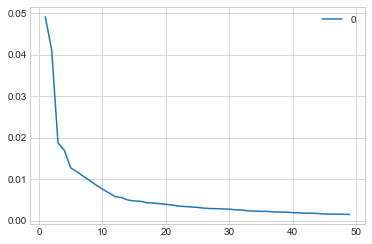

In [11]:
explained_variance = pd.DataFrame(explained_variance)
explained_variance[1:50].plot()

The variance value / contribution provided by the components is very low beyond 30. 
So considering 30 components will be sufficient

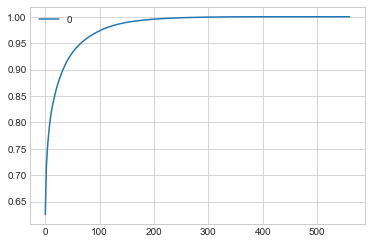

In [12]:
explained_variance_cum =  np.cumsum(explained_variance)
explained_variance_cum.plot(grid = True)

In [13]:
pca = PCA(n_components = 25)
X_train_pca = pca.fit_transform(X_train)
X_train_pca = pd.DataFrame(X_train_pca)
pd.DataFrame(X_train_pca).head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-5.520280,-0.290278,-1.529929,1.333242,1.425089,-0.194707,0.577452,0.691485,-1.222873,-0.363459,...,0.038534,-0.243808,-0.649045,0.521563,0.524691,-0.233892,-0.274547,-0.156500,-0.481440,-0.620057
1,-5.535350,-0.082530,-1.924804,0.671273,0.671260,0.735143,-0.616908,-0.771715,-0.615493,-0.895514,...,0.172286,0.129947,0.461911,0.159928,0.041086,0.372406,0.556474,-0.010526,0.067119,-0.148826
2,-5.474988,0.287387,-2.144642,0.531807,0.207824,-0.037773,0.057629,0.093912,-0.063122,-0.216919,...,-0.261354,0.009515,0.331418,0.555464,0.156072,0.352113,0.912548,0.248099,0.156070,0.053832
3,-5.677232,0.897031,-2.018220,0.157125,0.759085,1.079546,-0.267806,-0.731393,0.281301,0.466249,...,-0.104158,0.055824,-0.301440,-0.050730,-0.293156,-0.139371,-0.136053,-0.120183,-0.361072,0.367205
4,-5.748749,1.162952,-2.139533,0.207823,0.473090,0.463035,-0.152227,-0.107505,0.289812,0.539220,...,0.143010,0.263256,0.210545,-0.698856,-0.503055,-0.518004,0.342703,0.385108,-0.136445,0.232430


In [14]:
Y_train.columns = ['label']
X_train_set = X_train_pca.join(Y_train)
X_train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,label
0,-5.520280,-0.290278,-1.529929,1.333242,1.425089,-0.194707,0.577452,0.691485,-1.222873,-0.363459,...,-0.243808,-0.649045,0.521563,0.524691,-0.233892,-0.274547,-0.156500,-0.481440,-0.620057,5
1,-5.535350,-0.082530,-1.924804,0.671273,0.671260,0.735143,-0.616908,-0.771715,-0.615493,-0.895514,...,0.129947,0.461911,0.159928,0.041086,0.372406,0.556474,-0.010526,0.067119,-0.148826,5
2,-5.474988,0.287387,-2.144642,0.531807,0.207824,-0.037773,0.057629,0.093912,-0.063122,-0.216919,...,0.009515,0.331418,0.555464,0.156072,0.352113,0.912548,0.248099,0.156070,0.053832,5
3,-5.677232,0.897031,-2.018220,0.157125,0.759085,1.079546,-0.267806,-0.731393,0.281301,0.466249,...,0.055824,-0.301440,-0.050730,-0.293156,-0.139371,-0.136053,-0.120183,-0.361072,0.367205,5
4,-5.748749,1.162952,-2.139533,0.207823,0.473090,0.463035,-0.152227,-0.107505,0.289812,0.539220,...,0.263256,0.210545,-0.698856,-0.503055,-0.518004,0.342703,0.385108,-0.136445,0.232430,5


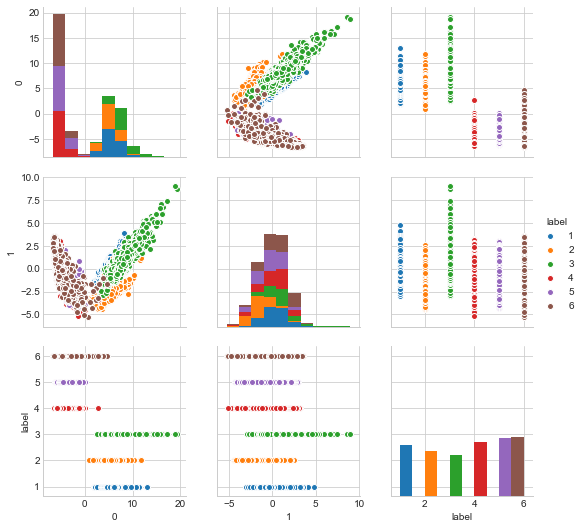

In [15]:
sb.pairplot(X_train_set[[0,1,'label']], hue="label")

In [16]:
clf = SVC()
clf.fit(X_train_pca,Y_train.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace = True, header = None)
Y_test = pd.read_csv('UCI HAR Dataset/test/Y_test.txt', delim_whitespace = True, header = None)
X_test_pca = pca.fit_transform(X_test)

In [18]:
pred = clf.predict(X_test_pca)

In [19]:
confusion_matrix(Y_test, pred)

array([[267,  34, 195,   0,   0,   0],
       [ 57, 319,  95,   0,   0,   0],
       [188,  42, 190,   0,   0,   0],
       [  0,   0,   0, 375,  92,  24],
       [  0,   1,   0, 232, 292,   7],
       [  0,   0,   0, 136,   9, 392]], dtype=int64)

In [20]:
accuracy_score(Y_test, pred)

0.6226671191041737

In [21]:
Y_train.describe()

,label
count,7352
unique,6
top,6
freq,1407


In [22]:
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-5.520280,-0.290278,-1.529929,1.333242,1.425089,-0.194707,0.577452,0.691485,-1.222873,-0.363459,...,0.038534,-0.243808,-0.649045,0.521563,0.524691,-0.233892,-0.274547,-0.156500,-0.481440,-0.620057
1,-5.535350,-0.082530,-1.924804,0.671273,0.671260,0.735143,-0.616908,-0.771715,-0.615493,-0.895514,...,0.172286,0.129947,0.461911,0.159928,0.041086,0.372406,0.556474,-0.010526,0.067119,-0.148826
2,-5.474988,0.287387,-2.144642,0.531807,0.207824,-0.037773,0.057629,0.093912,-0.063122,-0.216919,...,-0.261354,0.009515,0.331418,0.555464,0.156072,0.352113,0.912548,0.248099,0.156070,0.053832
3,-5.677232,0.897031,-2.018220,0.157125,0.759085,1.079546,-0.267806,-0.731393,0.281301,0.466249,...,-0.104158,0.055824,-0.301440,-0.050730,-0.293156,-0.139371,-0.136053,-0.120183,-0.361072,0.367205
4,-5.748749,1.162952,-2.139533,0.207823,0.473090,0.463035,-0.152227,-0.107505,0.289812,0.539220,...,0.143010,0.263256,0.210545,-0.698856,-0.503055,-0.518004,0.342703,0.385108,-0.136445,0.232430


In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_pca,Y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
pred = classifier.predict(X_test_pca)

In [25]:
confusion_matrix(Y_test, pred)

array([[230,  94, 172,   0,   0,   0],
       [ 92, 169, 109,  10,   0,  91],
       [187,  35, 195,   0,   0,   3],
       [  0,   1,   0, 259, 200,  31],
       [  1,   5,   1, 288, 219,  18],
       [  3,   0,   5, 165,  36, 328]], dtype=int64)

In [26]:
accuracy_score(Y_test, pred)

0.4750593824228028

In [36]:
from sklearn.neural_network import MLPClassifier
clf_nn = MLPClassifier(solver='lbfgs', hidden_layer_sizes = (30,30), random_state = 1)
clf_nn.fit(X_train_pca,Y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [37]:
pred_nn = clf_nn.predict(X_test_pca)

In [38]:
accuracy_score(Y_test, pred_nn)

0.5846623685103495

## Neural Network: 
Considering dataset with all the 756 columns
And used 280, 280 hidden layers to attain an accuracy of 94%

In [39]:
clf_nn = MLPClassifier(solver='lbfgs', hidden_layer_sizes = (280,280), random_state = 1)
clf_nn.fit(X_train,Y_train.values.ravel())

pred_nn = clf_nn.predict(X_test)
accuracy_score(Y_test, pred_nn)

0.9477434679334917